# Example - Selecting FRET populations

*This notebook is part of smFRET burst analysis software [FRETBursts](http://opensmfs.github.io/FRETBursts/).*

> In this notebook shows two methods to select FRET populations: size filtering and DCBS.
> For a complete tutorial on burst analysis see 
> [FRETBursts - us-ALEX smFRET burst analysis](FRETBursts - us-ALEX smFRET burst analysis.ipynb).

In [1]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.7+46.ge31fadb.dirty).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1371/journal.pone.0160716 

--------------------------------------------------------------


In [2]:
sns = init_notebook(apionly=True)
print('seaborn version: ', sns.__version__)

seaborn version:  0.11.2


In [3]:
# Tweak here matplotlib style
import matplotlib as mpl
mpl.rcParams['font.sans-serif'].insert(0, 'Arial')
mpl.rcParams['font.size'] = 12
%config InlineBackend.figure_format = 'retina'

# Get and process data

In [4]:
url = 'http://files.figshare.com/2182601/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5'
download_file(url, save_dir='./data')
full_fname = "./data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5"

d = loader.photon_hdf5(full_fname)
loader.alex_apply_period(d)
d.calc_bg(bg.exp_fit, time_s=1000, tail_min_us=(800, 4000, 1500, 1000, 3000))
d.burst_search(min_rate_cps=8e3)
ds = d.select_bursts(select_bursts.size, add_naa=True, th1=40)

URL:  http://files.figshare.com/2182601/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5
File: 0023uLRpitc_NTP_20dT_0.5GndCl.hdf5
 
File already on disk: /home/paul/Disk/Python/OpenSMFS/FRETBursts_notebooks/notebooks/data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5 
Delete it to re-download.
# Total photons (after ALEX selection):     2,259,522
#  D  photons in D+A excitation periods:      721,537
#  A  photons in D+A excitation periods:    1,537,985
# D+A photons in  D  excitation period:     1,434,842
# D+A photons in  A  excitation period:       824,680

 - Calculating BG rates ... get bg th arrays
Channel 0
[DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]


# Filtering method

We can select the FRET population (S ~ 0.5) combining these two filters:

1. Filter out A-only: select bursts with counts during $D_{ex}$ > threshold
2. Filter out D-only: select bursts with counts in $A_{ex}A_{em}$ > threshold

In code, this becomes:

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.figure.Figure'>


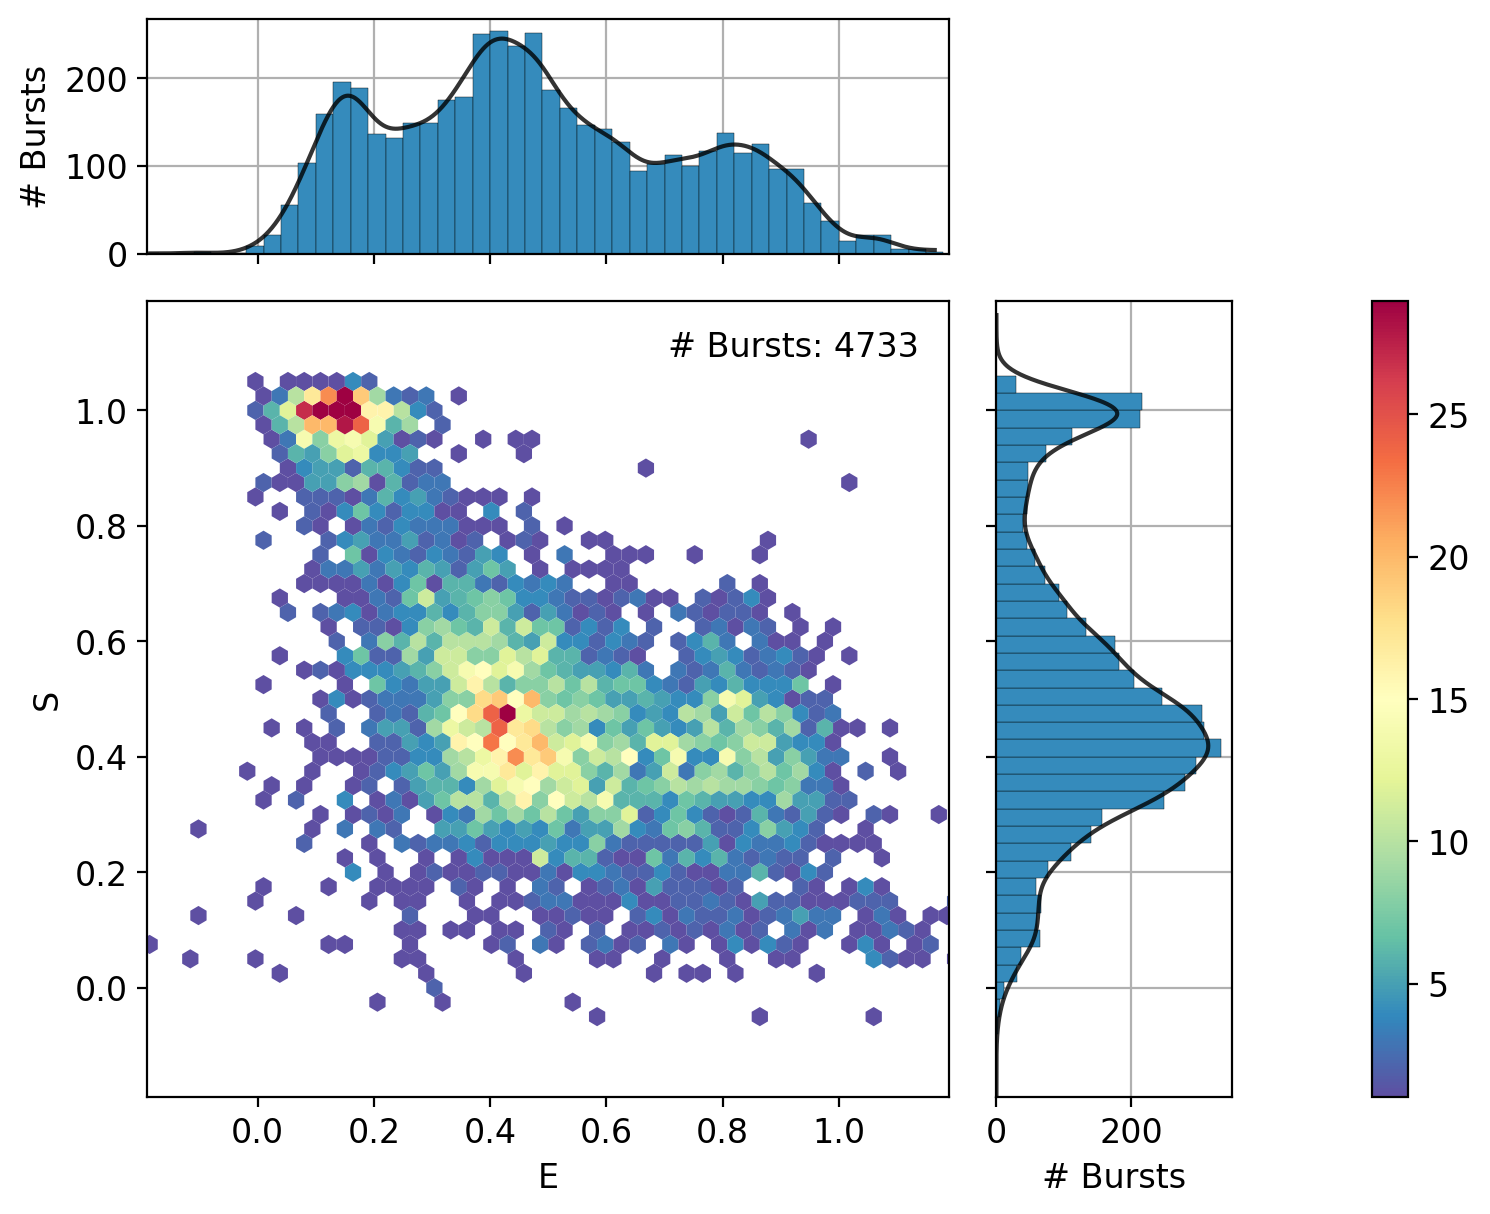

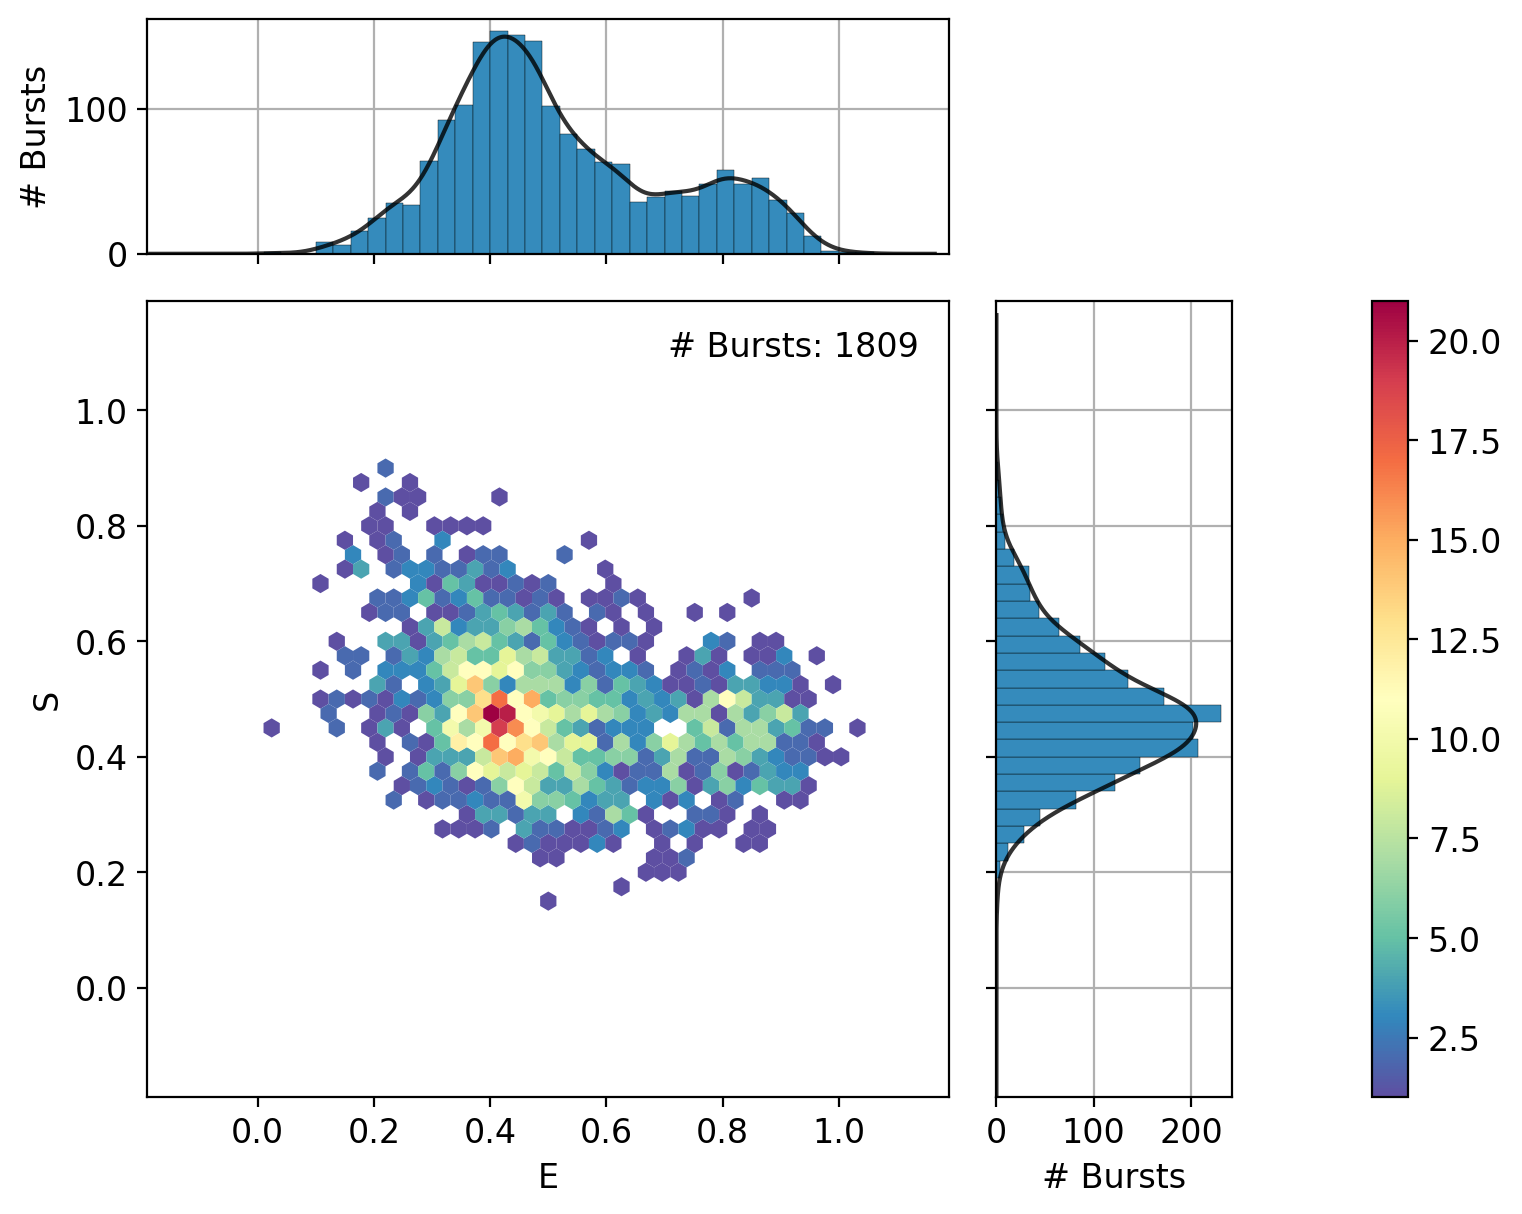

In [5]:
ds_no_Aonly = ds.select_bursts(select_bursts.size, th1=30)
ds_fret = ds_no_Aonly.select_bursts(select_bursts.naa, th1=30)

alex_jointplot(ds)
alex_jointplot(ds_fret);

## DCBS Method

With Dual-channel Burst Search (DCBS),
we define bursts as the intersection of a burst search performed on $D_{ex}$ stream and 
one performed on $A_{ex}A_{em}$ stream (see ([Nir et al. JPC 2006](doi.org/10.1021/jp063483n))).

In this way we filter D-only and A-only bursts,
but also we reduce the burst duration of FRET bursts to the portion where
$D_{ex}$ and $A_{ex}A_{em}$ both give signal. This property allows filtering 
acceptor photo-blinking, that causes part of a burst to appear as D-only.

To perform DCBS in FRETBursts we use:

In [6]:
d_fret_2 = bext.burst_search_and_gate(d)

Deep copy executed.
Deep copy executed.
Deep copy executed.
 - Performing burst search (verbose=False) ... - Recomputing background limits for Dex ... [DONE]
 - Recomputing background limits for all ... [DONE]
 - Fixing  burst data to refer to ph_times_m ... [DONE]
[DONE]
 - Calculating burst periods ...[DONE]
 - Performing burst search (verbose=False) ... - Recomputing background limits for AexAem ... [DONE]
 - Recomputing background limits for all ... [DONE]
 - Fixing  burst data to refer to ph_times_m ... [DONE]
[DONE]
 - Calculating burst periods ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]


The function [bext.burst_search_and_gate()](http://fretbursts.readthedocs.io/en/latest/plugins.html?highlight=burst_search_and#fretbursts.burstlib_ext.burst_search_and_gate)
performs two burst searches on the photon streams defined by `ph_sel1` and `ph_sel2` arguments
(by default `ph_sel1=Ph_sel(Dex='DAem')` and `ph_sel2=Ph_sel(Aex='Aem')`, i.e. $D_{ex}$ and $A_{ex}A_{em}$).
Then, it takes the "intersection in time" (and-gate) for the two sets of bursts.


`burst_search_and_gate` accepts the same 
*m*, *F*, and *min_rate_cps* arguments as [Data.burst_search()](http://fretbursts.readthedocs.io/en/latest/data_class.html#fretbursts.burstlib.Data.burst_search).
It is also possible to use different burst search parameters for the two
burst searches:

In [7]:
d_fret_22 = bext.burst_search_and_gate(d, m=(8, 10), F=(5, 12))

Deep copy executed.
Deep copy executed.
Deep copy executed.
 - Performing burst search (verbose=False) ... - Recomputing background limits for Dex ... [DONE]
 - Recomputing background limits for all ... [DONE]
 - Fixing  burst data to refer to ph_times_m ... [DONE]
[DONE]
 - Calculating burst periods ...[DONE]
 - Performing burst search (verbose=False) ... - Recomputing background limits for AexAem ... [DONE]
 - Recomputing background limits for all ... [DONE]
 - Fixing  burst data to refer to ph_times_m ... [DONE]
[DONE]
 - Calculating burst periods ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   [DONE Counting D/A]


Before plotting we still need to select bursts by size:

<class 'matplotlib.figure.Figure'>


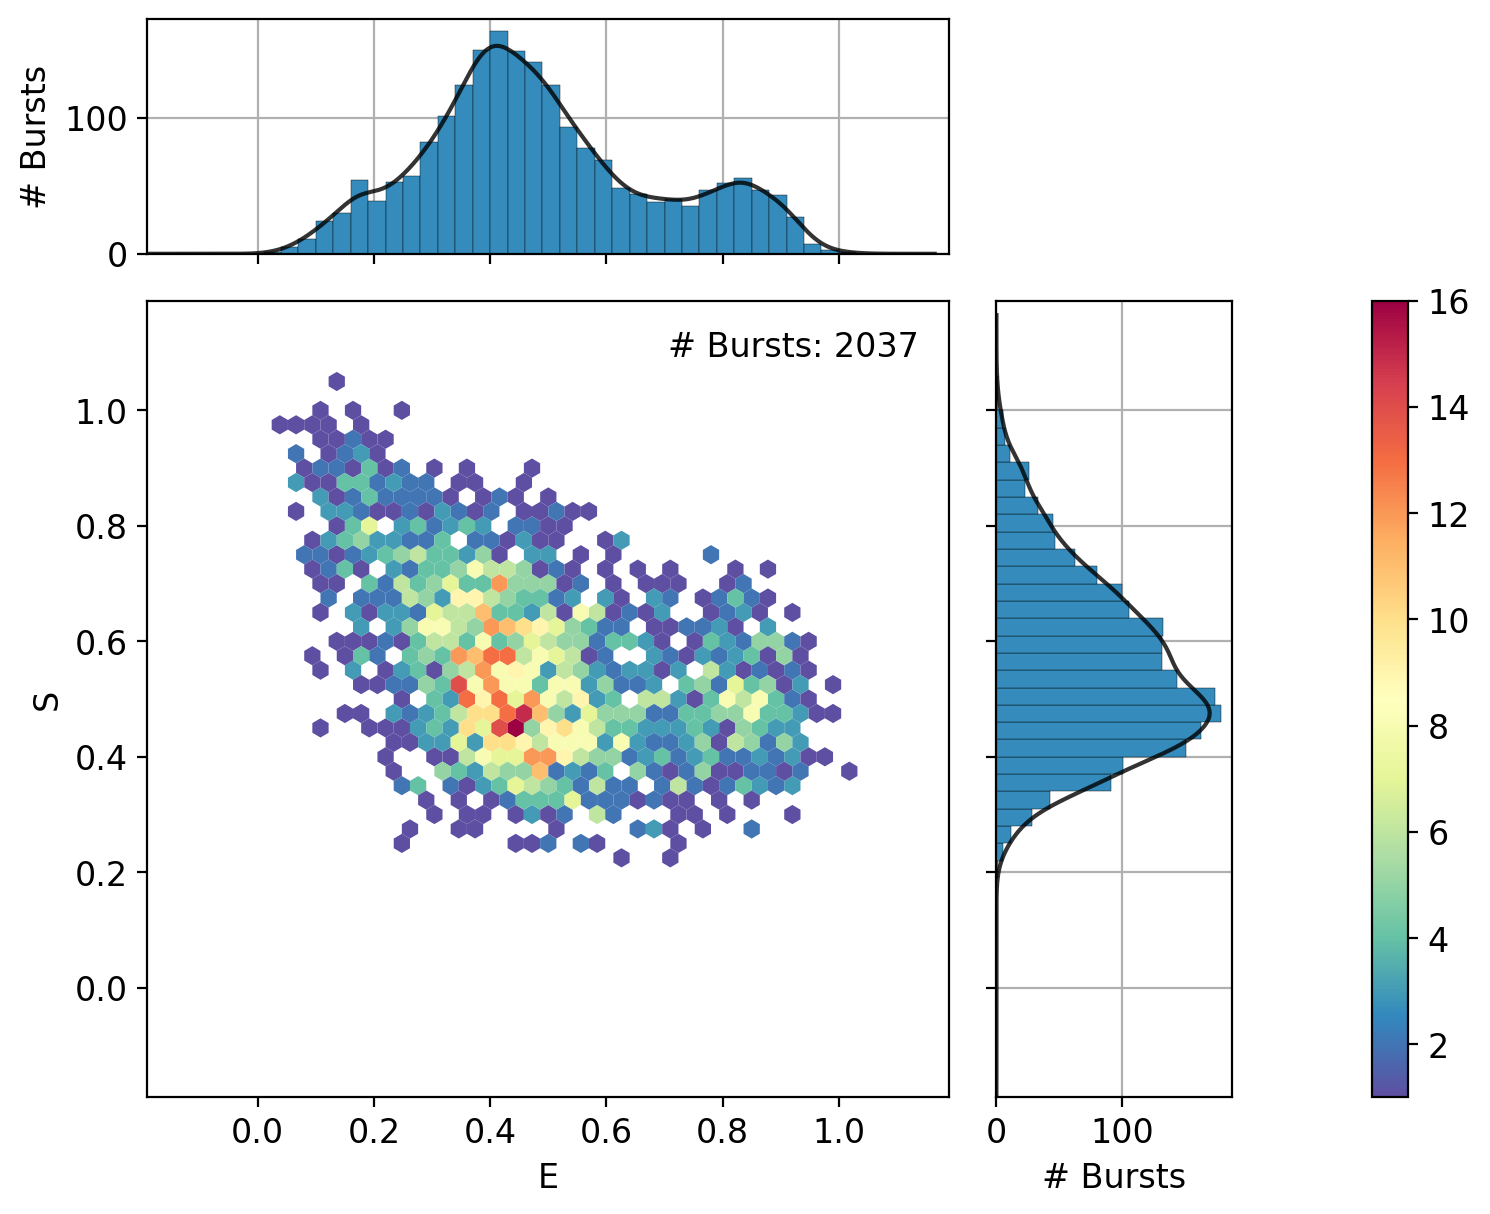

In [8]:
ds_fret_2 = d_fret_2.select_bursts(select_bursts.size, th1=30)
alex_jointplot(ds_fret_2);

<class 'matplotlib.figure.Figure'>


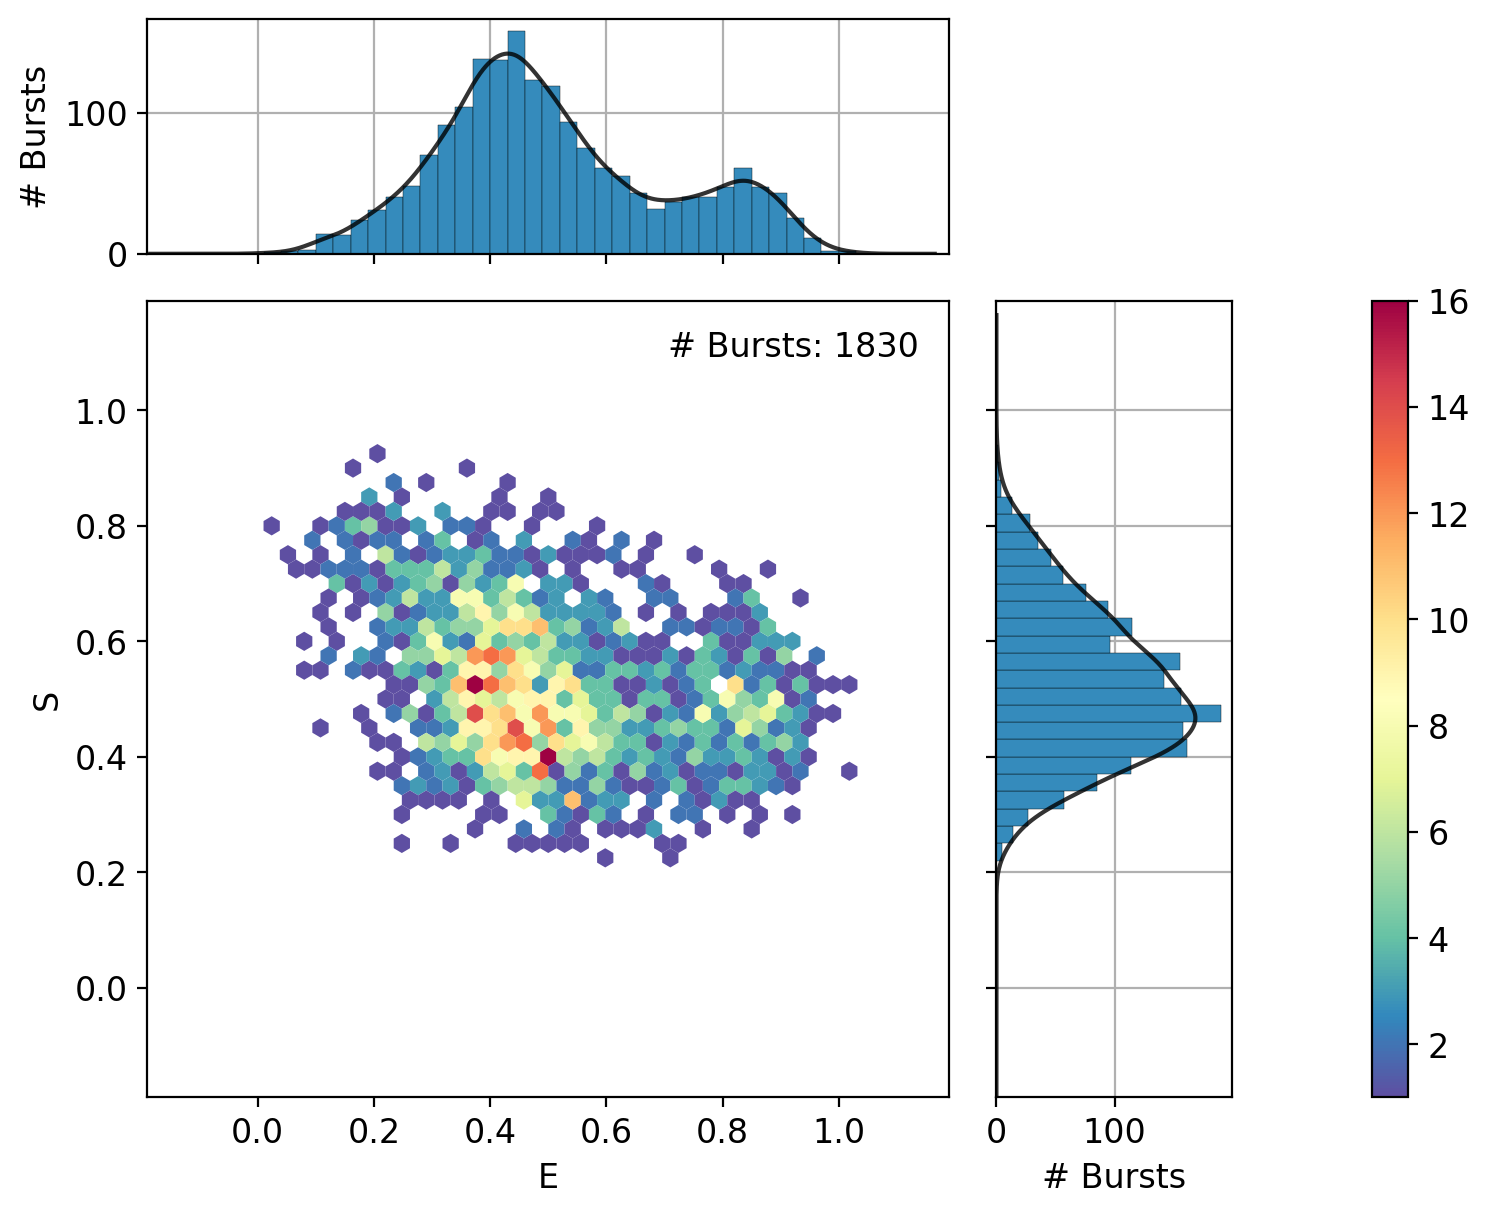

In [9]:
ds_fret_22 = d_fret_22.select_bursts(select_bursts.size, th1=30)
alex_jointplot(ds_fret_22);